In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# data analysis and wrangling
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
tf=pd.read_csv('/kaggle/input/titanic/test.csv')

In [5]:
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
np.percentile(df['Survived'],[61,62])

array([0., 1.])

In [11]:
np.percentile(df['Fare'],[1,2,3,20,55,80,85,89,95,99,100])

array([  0.     ,   6.3975 ,   6.975  ,   7.8542 ,  16.1    ,  39.6875 ,
        56.4958 ,  73.5    , 112.07915, 249.00622, 512.3292 ])

In [12]:
np.percentile(df['SibSp'],[68,69])

array([0., 1.])

In [13]:
np.percentile(df['Pclass'],[24,25,44,45])

array([1., 2., 2., 3.])

In [14]:
np.percentile(df['Parch'],[76,77])

array([0., 1.])

In [15]:
age=df['Age']
age.describe([.1,.2,.3,.4,0.5,0.6,0.7,0.8,.9,.96,.97,.98,.99])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
96%       58.000000
97%       60.610000
98%       62.740000
99%       65.870000
max       80.000000
Name: Age, dtype: float64

In [16]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Leyson, Mr. Robert William Norman",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [17]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [21]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


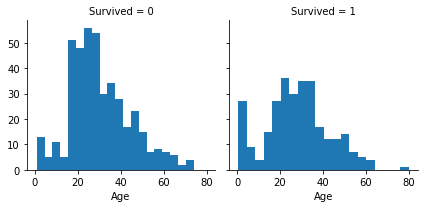

In [22]:
 g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

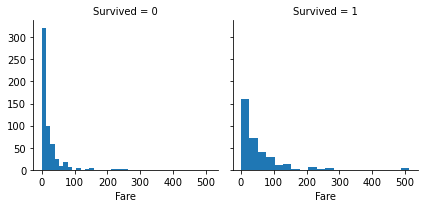

In [23]:
 g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

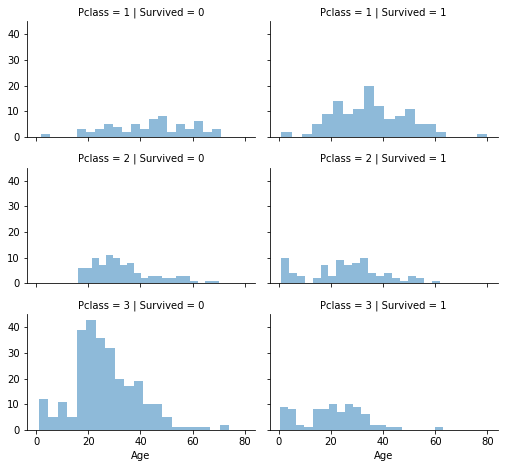

In [24]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

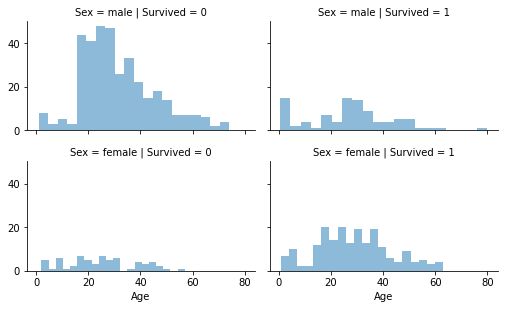

In [25]:
grid = sns.FacetGrid(df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

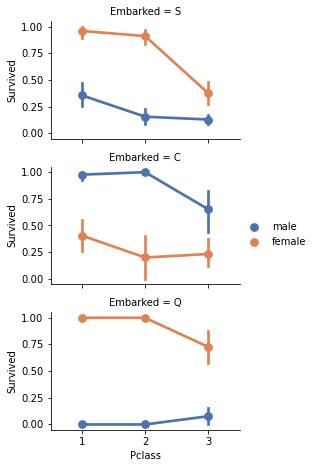

In [26]:
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

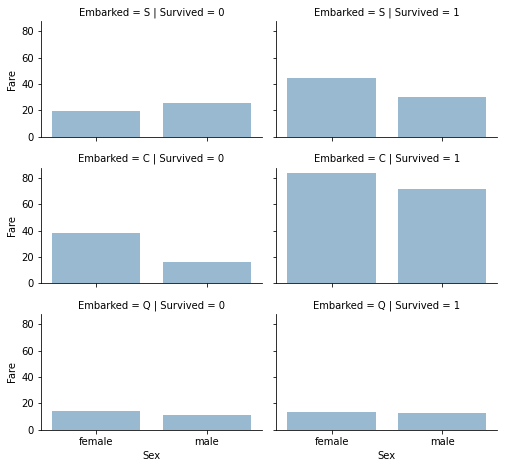

In [27]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [28]:
df = df.drop(['Ticket', 'Cabin'], axis=1)
tf = tf.drop(['Ticket', 'Cabin'], axis=1)
combine = [df, tf]

In [29]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'],df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [30]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [31]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [32]:
df = df.drop(['Name', 'PassengerId'], axis=1)
tf = tf.drop(['Name'], axis=1)
combine=[df,tf]
df.shape, tf.shape

((891, 9), (418, 9))

In [33]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


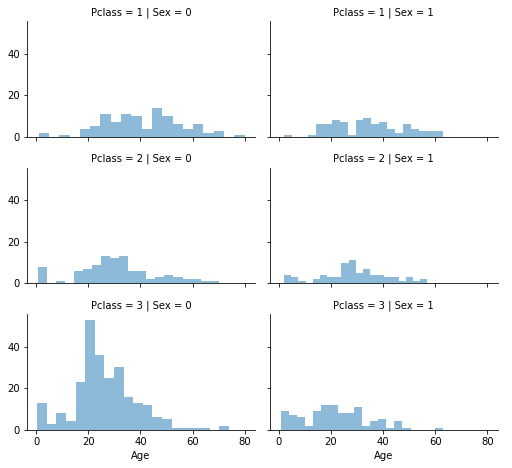

In [34]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [35]:
guess_ages = np.zeros((2,3))

In [36]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [37]:
df['AgeBand'] = pd.cut(df['Age'], 10)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 8.0]",0.666667
1,"(8.0, 16.0]",0.413043
2,"(16.0, 24.0]",0.400000
3,"(24.0, 32.0]",0.287273
4,"(32.0, 40.0]",0.439189
5,"(40.0, 48.0]",0.352941
6,"(48.0, 56.0]",0.466667
7,"(56.0, 64.0]",0.375000
8,"(64.0, 72.0]",0.000000
9,"(72.0, 80.0]",0.500000


In [38]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 64), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [39]:
df = df.drop(['AgeBand'], axis=1)
combine = [df, tf]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7.2500,S,1
1,1,1,1,3,1,0,71.2833,C,3
2,1,3,1,2,0,0,7.9250,S,2
3,1,1,1,3,1,0,53.1000,S,3
4,0,3,0,3,0,0,8.0500,S,1


In [40]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [41]:
tf.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,0,3,0,0,7.8292,Q,1,1
1,893,3,1,4,1,0,7.0000,S,3,2
2,894,2,0,5,0,0,9.6875,Q,1,1
3,895,3,0,2,0,0,8.6625,S,1,1
4,896,3,1,2,1,1,12.2875,S,3,3


In [42]:
for dataset in combine:    
    dataset.loc[ dataset['FamilySize'] <=2, 'FamilySize'] = 0
    dataset.loc[(dataset['FamilySize'] > 2) & (dataset['FamilySize'] <= 4), 'FamilySize'] = 1
    dataset.loc[ dataset['FamilySize'] > 4, 'FamilySize']

In [43]:
df = df.drop(['Parch', 'SibSp'], axis=1)
tf = tf.drop(['Parch', 'SibSp'], axis=1)
combine = [df, tf]

In [44]:
freq_port = df.Embarked.dropna().mode()[0]
freq_port

'S'

In [45]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [46]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,2,7.2500,0,1,0
1,1,1,1,3,71.2833,1,3,0
2,1,3,1,2,7.9250,0,2,0
3,1,1,1,3,53.1000,0,3,0
4,0,3,0,3,8.0500,0,1,0


In [47]:
tf['Fare'].fillna(tf['Fare'].dropna().median(), inplace=True)
tf.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,3,7.8292,2,1,0
1,893,3,1,4,7.0000,0,3,0
2,894,2,0,5,9.6875,2,1,0
3,895,3,0,2,8.6625,0,1,0
4,896,3,1,2,12.2875,0,3,1


In [48]:
df['FareBand'] = pd.qcut(df['Fare'], 3)
df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [49]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 8.662, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8.662) & (dataset['Fare'] <= 26), 'Fare'] = 1
    dataset.loc[ dataset['Fare'] > 26, 'Fare']
    dataset['Fare'] = dataset['Fare'].astype(int)
df = df.drop(['FareBand'], axis=1)
combine = [df, tf]
    

In [50]:
for dataset in combine:
    dataset['Pclass*Age'] = dataset.Pclass * dataset.Age

df.loc[:, ['Pclass*Age', 'Pclass', 'Age']].head(10)

,Pclass*Age,Pclass,Age
0,6,3,2
1,3,1,3
2,6,3,2
3,3,1,3
4,9,3,3
5,6,3,2
6,5,1,5
7,0,3,0
8,6,3,2
9,2,2,1


In [51]:
for dataset in combine:
    dataset['Fare*Embarked'] = dataset.Fare * dataset.Embarked

df.loc[:, ['Fare*Embarked', 'Fare', 'Embarked']].head(10)

,Fare*Embarked,Fare,Embarked
0,0,0,0
1,71,71,1
2,0,0,0
3,0,53,0
4,0,0,0
5,0,0,2
6,0,51,0
7,0,1,0
8,0,1,0
9,30,30,1


In [52]:
X_train = df.drop("Survived", axis=1)
Y_train =df["Survived"]
PI=tf["PassengerId"]
X_test  = tf.drop("PassengerId", axis=1).copy()

In [53]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
feature_scores = pd.Series(random_forest .feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Title            0.228121
Sex              0.200647
Fare             0.157337
Pclass           0.098770
FamilySize       0.092649
Pclass*Age       0.085714
Age              0.052927
Fare*Embarked    0.049398
Embarked         0.034437
dtype: float64

In [54]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

90.8

In [55]:

output = pd.DataFrame({'PassengerId':PI, 'Survived':Y_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
